In [34]:
import numpy as np 
import pandas as pd 

import json
import time
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import explained_variance_score, roc_auc_score, precision_recall_curve, roc_curve, average_precision_score,accuracy_score
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score, cross_validate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#from mpl_toolkits.basemap import Basemap

import gc
import os
print(os.listdir("."))

['.DS_Store', '.ipynb_checkpoints', 'Assignment-1.pdf', 'electricity-demand-prediction.ipynb', 'input']


In [35]:
in_file_name = "Home1_yr1.csv"
out_file_name = "home1_out.csv"

In [36]:
column_names = ['load_demand']
house_data = pd.read_csv("./input/" + in_file_name, low_memory=False, nrows=None, names=column_names)
house_data.shape

(35040, 1)

In [37]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 1 columns):
load_demand    35040 non-null float64
dtypes: float64(1)
memory usage: 273.8 KB


In [38]:
house_data.describe()

,load_demand
count,35040.000000
mean,1.327208
std,1.399019
min,0.015124
25%,0.315678
50%,0.722875
75%,1.988425
max,15.500000


In [39]:

epochTime = 1417392000

def get_time_stamp(row):
    global epochTime
    epochTime+=900
    return pd.to_datetime(epochTime,unit='s')

house_data['time_stamp'] = house_data.apply (lambda row: get_time_stamp(row),axis=1)


In [40]:
house_data.head(10)

,load_demand,time_stamp
0,0.65018,2014-12-01 00:15:00
1,1.45400,2014-12-01 00:30:00
2,0.72971,2014-12-01 00:45:00
3,3.10750,2014-12-01 01:00:00
4,0.63572,2014-12-01 01:15:00
5,0.69720,2014-12-01 01:30:00
6,1.50610,2014-12-01 01:45:00
7,0.85858,2014-12-01 02:00:00
8,1.61320,2014-12-01 02:15:00
9,0.66075,2014-12-01 02:30:00


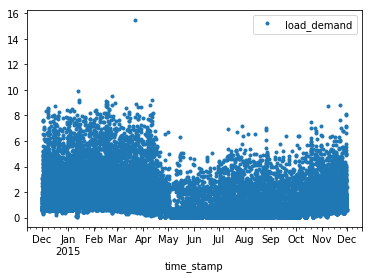

In [41]:

house_data.plot('time_stamp', 'load_demand', style=".")

In [42]:
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2014-12-01', end='2015-11-30').to_pydatetime()

#get hour:minute format
def hour_minute(row_data):
    return (row_data.time_stamp.hour) #* 100 + (row_data.pickup_datetime.minute)

#get day_of_week format
def day_of_week(row_data):
    return (row_data.time_stamp.weekday())

def check_holiday(row_data):
    strip_date = datetime.datetime.strptime((str(row_data.time_stamp)[:10] ),'%Y-%m-%d')
    return 1 if strip_date in holidays else 0

#get month format
def day_of_week(row_data):
    return (row_data.time_stamp.month())

house_data['time_of_day'] = house_data.apply(lambda row: hour_minute(row), axis=1)
house_data['day_of_week'] = house_data.apply(lambda row: day_of_week(row), axis=1)
house_data['holiday'] = house_data.apply(lambda row: check_holiday(row), axis=1)
house_data['month_of_year'] = house_data.apply(lambda row: get_month(row), axis=1)

house_data.head(10)

TypeError: ("'int' object is not callable", 'occurred at index 0')

In [46]:
#get day_of_week format

house_data.time_stamp[0].month

12